## LINEAR REGRESSION 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('height-weight.csv')

In [4]:
data

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [5]:
data.shape

(23, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


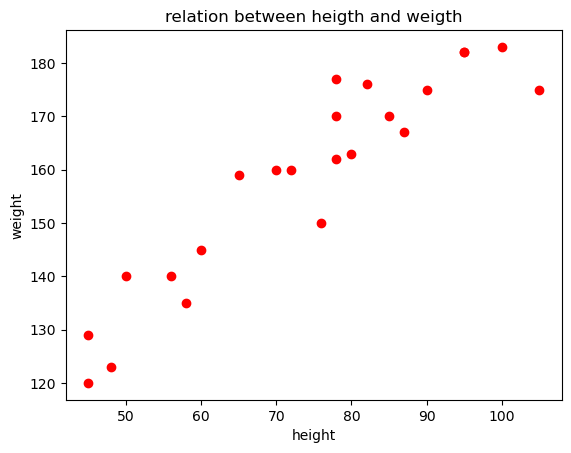

In [9]:
plt.scatter(data['Weight'],data['Height'],color = "red")
plt.title("relation between heigth and weigth")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

#### through our plot we can see there is a linear relation 

### probel statement is to predict the height using the weight 

In [12]:
# dividing data into x and y

In [13]:
x = data[['Weight']]
y = data.Height

In [14]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [15]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

In [18]:
# scaling -> optional 
#  for that we need to know about the mean ( mu ) and std_dev ( sigma )
# we learn it from train data -> .fit = learning the data .transform = applying that mu and sigma
from sklearn.preprocessing import StandardScaler 

In [19]:
# in most of machine learning model we use standard scaler as it deals with normal distribution
scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
scaler.fit(x_train)

StandardScaler()

In [21]:
scaler.scale_

array([16.76719681])

In [22]:
mu  = scaler.mean_
sigma = np.sqrt(scaler.var_)

In [23]:
mu

array([74.5])

In [24]:
sigma

array([16.76719681])

In [25]:
# scaling should done after train test split
# scaling should not be done on target col
# scaling should not be done for categorical feature

In [26]:
x_train_scaled = scaler.fit_transform(x_train) # for train data use fit_transform
x_test_scaled = scaler.transform(x_test) # for test data use transformm

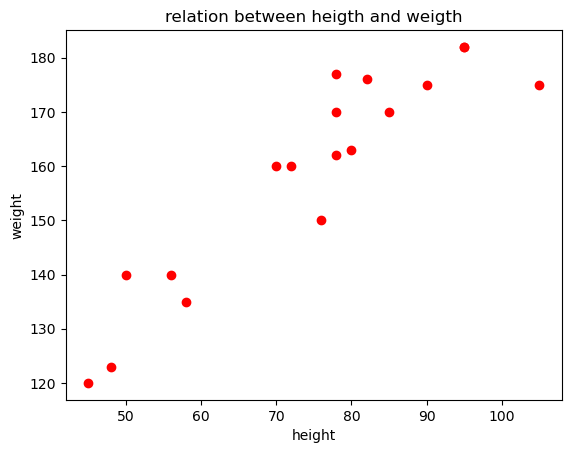

In [27]:
plt.scatter(x_train,y_train,color = "red")
plt.title("relation between heigth and weigth")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

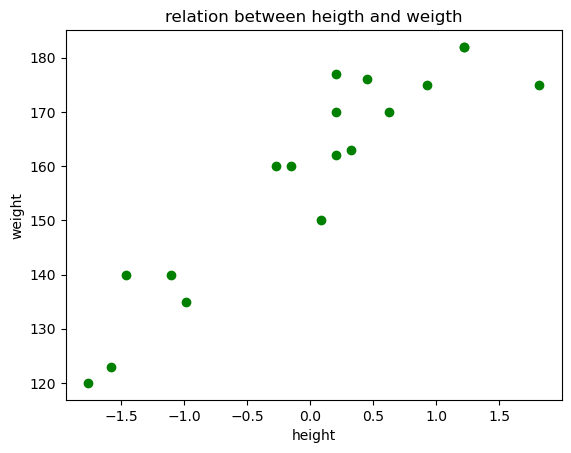

In [28]:
plt.scatter(x_train_scaled,y_train,color = "green")
plt.title("relation between heigth and weigth")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [29]:
# model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [30]:
model.fit(x_train_scaled , y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test_scaled)

In [32]:
train_accuracy = model.score(x_train_scaled,y_train)

In [33]:
test_accuracy = model.score(x_test_scaled,y_test)

In [45]:
print(f"the train accuraccy for our model is {train_accuracy*100:.2f} %, and the test accuracy for our model is {test_accuracy*100:.2f} %")

the train accuraccy for our model is 85.18 %, and the test accuracy for our model is 91.72 %


In [47]:
# linear regression parameters 
# 1 - fit_intercept --> the best fit line has intercept ? by default its true if false -> best fit line goes through origin
# copy_X -> first copy the orginal data then train model .. do not change the original data
# n_jobs -> -1 means using all processors . by default it is none
# positive --> when set to true , forces all coeff to be true
# fit -> train the model
# predict -> test the model 

In [49]:
# linear regression attributes
# coef_
# intercept_

In [71]:
print(f"the slope or coeff of the model's best fit line is {model.coef_}")

the slope or coeff of the model's best fit line is [17.73635106]


In [67]:
print(f"the slope or coeff of the model's best fit line is {model.intercept_:.2f}")

the slope or coeff of the model's best fit line is 158.89


In [77]:
# performance metrix
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [85]:
print(f"the mean absolute error for our model is {mean_absolute_error(y_test , y_pred):.2f}")
print(f"the mean squared error for our model is {mean_squared_error(y_test , y_pred):.2f}")
print(f"the r2 for our model is {r2_score(y_test , y_pred):.2f}")

the mean absolute error for our model is 4.18
the mean squared error for our model is 28.28
the r2 for our model is 0.92


In [87]:
error = y_test - y_pred

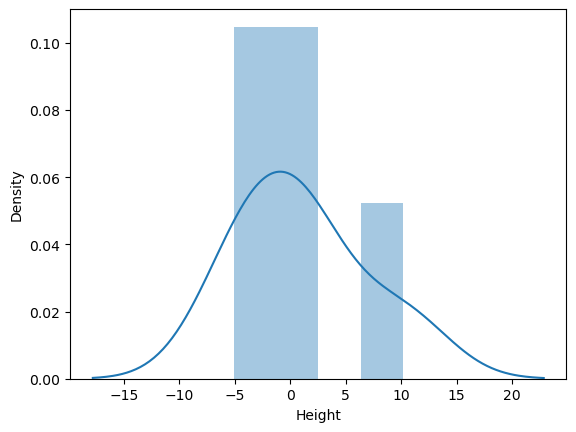

In [103]:
sns.distplot(error) # approximately normal for all the error  
plt.show()